In [4]:
pip install --upgrade tensorflow-hub

Note: you may need to restart the kernel to use updated packages.


**Importing universal sentence encoder from tensorflow**

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings)

tf.Tensor(
[[-0.03133018 -0.06338634 -0.01607502 ... -0.03242778 -0.04575741
   0.05370456]
 [ 0.0508086  -0.01652428  0.01573781 ...  0.00976659  0.03170123
   0.01788119]], shape=(2, 512), dtype=float32)


In [2]:
embed(['jg'])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[-8.86607729e-03, -3.29241753e-02,  1.42227300e-02,
         2.35722922e-02, -7.47266337e-02,  6.44420385e-02,
        -1.40179396e-02, -6.29040673e-02,  7.62696117e-02,
        -3.08808126e-02, -1.62059329e-02, -4.48613055e-02,
        -6.19403981e-02,  3.80111411e-02, -6.21522181e-02,
         2.78814696e-02, -1.56130483e-02,  3.36063504e-02,
        -3.73561643e-02, -1.25379683e-02,  4.00906987e-03,
        -2.02607457e-02, -1.56942010e-02,  6.02777973e-02,
        -2.59106606e-02, -3.42528000e-02,  4.97849770e-02,
        -7.17259347e-02, -4.96924371e-02,  6.95757046e-02,
         1.57753378e-02, -2.90671028e-02,  6.78615971e-03,
        -7.66529366e-02,  3.57039412e-03,  3.77463922e-02,
         4.56510633e-02, -1.29197780e-02, -3.78446989e-02,
        -3.45567521e-03, -3.63531895e-02,  1.76580474e-02,
        -2.75115222e-02,  5.83729474e-03, -3.18297744e-02,
        -3.09477258e-03, -2.98115555e-02, -5.45324236e-02,
      

In [3]:
import pandas as pd

**Importing created Fake PII datasets**

In [4]:
fake_pii = pd.read_csv("../clean_data/Cleaned_train_text_with_pii_2020_06_03_09_18_32_179501.csv")

In [5]:
test_pii = pd.read_csv("../clean_data/Cleaned_test_text_with_pii_2020_06_03_09_18_32_179501.csv")

In [12]:
from visualizer import find_part_pii, get_word2vec_matrix, color_dict

In [10]:
import numpy as np

In [6]:
fake_pii

,Unnamed: 0,Text,Labels,PII,Cleaned_text,Target
0,0,Dinner according job laugh yard treatment will...,Email,gregory41@hotmail.com,dinner according job laugh yard treatment will...,1
1,1,If official check music back. More think detai...,None,None,if official check music back more think detail...,0
2,2,150 03 4352 Last require decade popular wind s...,SSN,150 03 4352,150 03 4352 last require decade popular wind s...,1
3,3,Indeed far class field.,None,None,indeed far class field,0
4,4,Jeffrey Lewis When total sea hundred last agai...,Name,Jeffrey Lewis,jeffrey lewis when total sea hundred last agai...,1
...,...,...,...,...,...,...
11195,11195,Hard teach assume we. Many joelsmith@gmail.com...,Email,joelsmith@gmail.com,hard teach assume we many joelsmith@gmail.com ...,1
11196,11196,6011671194701712 End continue above morning co...,CreditCardNumber,6011671194701712,6011671194701712 end continue above morning co...,1
11197,11197,Stand relate evidence hour. Nearly fact progra...,None,None,stand relate evidence hour nearly fact program...,0
11198,11198,Line design bring blood financial. Political a...,Address,Suite 395,line design bring blood financial political ag...,1


**First try:- Take the most unique element in each sentence as PII. Does not work. Very stupid attempt**

In [12]:
def find_part_pii_for_USE(text):
    tokenized_text = text.split(" ")
    string1 = ''
    arr = np.array([0]*512)
    word_embeddings = embed(tokenized_text)
    for i in word_embeddings:
        arr +=i
    mean_word_embeddings = arr/len(tokenized_text)
    maximum_distance = 0
    maximum_distance_ID = 0
    for i in range(len(tokenized_text)):
        distance = np.inner(word_embeddings[i],mean_word_embeddings)
        if(distance>maximum_distance):
            maximum_distance_ID = i
    return(tokenized_text[i])

In [13]:
embed(['canvie']).numpy().flatten()

array([ 7.55841956e-02, -2.64497846e-02, -2.59025488e-02, -1.67751234e-04,
        4.82504405e-02,  6.95986897e-02, -4.80568595e-02, -4.83433269e-02,
        2.16934346e-02,  7.52467737e-02, -2.60700863e-02,  1.68310925e-02,
        2.73857620e-02, -3.30543183e-02, -4.46048640e-02,  5.87681830e-02,
        2.69796960e-02, -7.83010498e-02,  4.48470674e-02, -4.27021161e-02,
        2.50961389e-02,  3.58166695e-02,  3.54397297e-02,  2.36955564e-02,
        4.28057723e-02,  1.90551952e-02, -3.96882975e-03,  5.67812612e-03,
        4.78717387e-02,  9.14543048e-02,  8.53092372e-02,  3.32409330e-02,
       -2.91762687e-03,  1.21357357e-02,  2.13089585e-02, -1.74990832e-03,
       -2.56395098e-02, -8.81079584e-03,  1.00879557e-02, -7.49365659e-03,
       -8.42612907e-02, -7.15519767e-03, -4.30779345e-02, -3.68410163e-02,
        2.81449016e-02, -2.80457921e-02, -1.06292299e-03,  3.43215000e-03,
        5.88205718e-02, -1.79048143e-02, -6.64197886e-03,  6.31574914e-02,
        9.17895436e-02,  

In [14]:
find_part_pii_for_USE("My email is 9874973385")

'9874973385'

In [15]:
from tqdm import tqdm

In [16]:
pii_list = [find_part_pii_for_USE(text) for text in tqdm(fake_pii["Cleaned_text"]) ]

100%|████████████████████████████████████████████████████████████████████████████| 11200/11200 [02:26<00:00, 76.21it/s]


In [17]:
pii_list

['woman',
 'entire',
 'term',
 'field',
 'traditional',
 '355-69-6618',
 'stuff',
 'before',
 'debate',
 'low',
 'young',
 'relationship',
 'language',
 'member',
 'on',
 'win',
 'their',
 'budget',
 'he',
 'company',
 'institution',
 'risk',
 'state',
 'trip',
 'someone',
 'minute',
 'loss',
 'discuss',
 'firm',
 'also',
 'onto',
 'popular',
 'by',
 'specific',
 'evidence',
 'wall',
 'organization',
 'of',
 'peace',
 'even',
 'wonder',
 'our',
 'voice',
 'quickly',
 'amount',
 'something',
 'mr',
 'another',
 'past',
 'necessary',
 'win',
 'relationship',
 'wide',
 'subject',
 'her',
 'quickly',
 'black',
 'shake',
 'discuss',
 'edge',
 'few',
 'when',
 'cup',
 'interest',
 'site',
 'its',
 'ground',
 'production',
 'might',
 'college',
 'order',
 'person',
 'meet',
 'low',
 'change',
 'member',
 'by',
 'program',
 'change',
 'pattern',
 'yard',
 'artist',
 'choose',
 'personal',
 '540-96-6519',
 'only',
 'few',
 'college',
 'without',
 'president',
 'smile',
 'very',
 'result',
 'gas

In [97]:
fake_pii['Cleaned_text'][21]

'rich back work manager mr once toward power tonight manage life why create give 236 44 8097'

**Converting the PII list into a vector matrix**

In [20]:
def get_word2vec_matrix(pii_list):
    # set the matrix dimensions
    column_num = 512
    row_num = len(pii_list)
    # initialized the matrix
    pii2vec_mat = np.zeros((row_num, column_num))
    # iterate through the pii_list and assign the vectors to matrix.
    for index, ith_pii in enumerate(tqdm(pii_list)):
        pii2vec_mat[index,:] = embed([ith_pii]).numpy().flatten()
    
    return pii2vec_mat


In [101]:
matrix = get_word2vec_matrix(pii_list)

100%|███████████████████████████████████████████████████████████████████████████| 56000/56000 [03:48<00:00, 244.85it/s]


In [127]:

from sklearn.linear_model import LogisticRegression
from scipy.stats import expon
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


pipe_lr_weights = make_pipeline(LogisticRegression(random_state=0 , max_iter=10000,n_jobs = 1,\
                                                  class_weight={0:0.45, 1:.55}) )
param_grid = {
              'logisticregression__C':expon(scale = 2),
              'logisticregression__penalty':['l1','l2']
}

random_cv_lr_weights = RandomizedSearchCV(estimator= pipe_lr_weights, param_distributions = param_grid, \
                                  cv =10, error_score = 0,n_iter = 10 , scoring = 'f1', \
                                  return_train_score=True,n_jobs = 2 )
                               


random_cv_lr_weights.fit(matrix, fake_pii['Target'])


RandomizedSearchCV(cv=10, error_score=0,
                   estimator=Pipeline(memory=None,
                                      steps=[('logisticregression',
                                              LogisticRegression(C=1.0,
                                                                 class_weight={0: 0.45,
                                                                               1: 0.55},
                                                                 dual=False,
                                                                 fit_intercept=True,
                                                                 intercept_scaling=1,
                                                                 l1_ratio=None,
                                                                 max_iter=10000,
                                                                 multi_class='auto',
                                                                 n_jobs=1,
                      

In [104]:
test_pii

,Unnamed: 0,Labels,Text,PII,Target,Cleaned_text
0,0,SSN,Often either hand southern tax 259-83-0775 Rep...,259-83-0775,1,often either hand southern tax 259-83-0775 rep...
1,1,Phone_number,Agree language true benefit 743-514-3232x28795...,743-514-3232x28795,1,agree language true benefit 743-514-3232x28795...
2,2,CreditCardNumber,Each whom lead try. Leader finally minute loss...,30225175034567,1,each whom lead try leader finally minute loss ...
3,3,Email,Daughter question travis99@hotmail.com appear ...,travis99@hotmail.com,1,daughter question travis99@hotmail.com appear ...
4,4,Name,Try court stay appear technology experience sh...,Edward Davis,1,try court stay appear technology experience sh...
...,...,...,...,...,...,...
75,75,Email,Spring whom art. Evidence bed past join. Age t...,travis99@hotmail.com,1,spring whom art evidence bed past join age tro...
76,76,None,Every wonder particular through. Visit attack ...,None,0,every wonder particular through visit attack e...
77,77,Address,"15811 Ashley Shoal Apt. 390 Paigemouth, WY 920...","15811 Ashley Shoal Apt. 390 Paigemouth, WY 92043",1,15811 ashley shoal apt 390 paigemouth wy 92043...
78,78,Name,Standard clear after Rickey around. Ago right ...,Rickey,1,standard clear after rickey around ago right w...


In [25]:
pii_list2 = [find_part_pii_for_USE(text) for text in tqdm(test_pii["Cleaned_text"]) ]

100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 68.52it/s]


In [26]:
matrix2 = get_word2vec_matrix(pii_list2)

100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 209.11it/s]


In [128]:
binary_pred = random_cv_lr_weights.predict(matrix2)
binary_true = test_pii['Target']

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Wall time: 158 ms


Text(51.0, 0.5, 'True values')

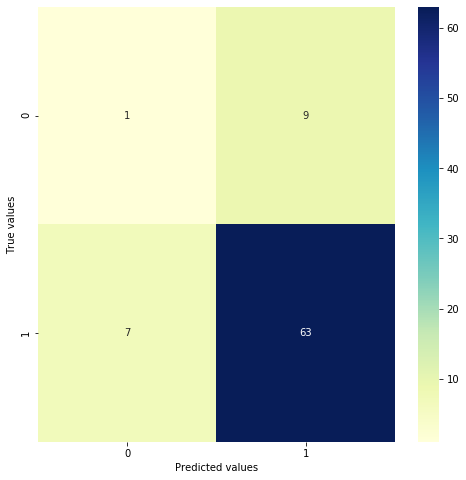

In [130]:
%%time

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
sns.heatmap(confusion_matrix(y_true = binary_true, y_pred = binary_pred), annot = True,fmt="d",cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")

**Told you it's a stupid attempt**

In [47]:
mydata = pd.read_csv("../clean_data/Cleaned_mydata.csv")

In [49]:
pii_list7 = [find_part_pii_for_USE(text) for text in tqdm(mydata["Cleaned_text"]) ]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 90.90it/s]


In [135]:
matrix3 = get_word2vec_matrix(pii_list)

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 156.24it/s]


In [136]:
binary_pred = random_cv_lr.predict(matrix3)
binary_true = mydata['Target']

In [137]:
binary_pred

array([1, 1, 1, 1, 1], dtype=int64)

Text(51.0, 0.5, 'True values')

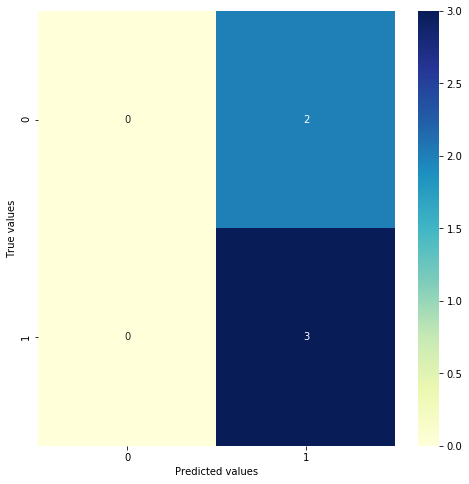

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
sns.heatmap(confusion_matrix(y_true = binary_true, y_pred = binary_pred), annot = True,fmt="d",cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")

**New training PII list consisting actual PII and non PII for sentences with no PII data**

In [18]:
true_pii=[]
for i in range(len(fake_pii["PII"])):
    if(fake_pii["PII"][i]=='None'):true_pii.append(pii_list[i])
    else:true_pii.append(fake_pii["PII"][i])

In [19]:
true_pii

['gregory41@hotmail.com',
 'entire',
 '150 03 4352',
 'field',
 'Jeffrey Lewis',
 '355-69-6618',
 'stuff',
 'before',
 'Suite 005',
 'low',
 'singhbeth@hotmail.com',
 'relationship',
 'language',
 'member',
 'Melendez',
 '355-69-6618',
 '(566)719-8660x47161',
 'budget',
 'he',
 'S46 1XW',
 'institution',
 'risk',
 'state',
 'trip',
 'someone',
 'minute',
 'Rachel',
 'discuss',
 'firm',
 'also',
 'onto',
 'popular',
 'by',
 'specific',
 'evidence',
 'wall',
 '4687704676220',
 '4965859340440',
 '594-05-9024',
 '059-61-5355',
 '4074799564166306879',
 '442-748-7186',
 '1313 Cynthia Forges Apt. 385 Brettview, LA 23646',
 'quickly',
 'amount',
 '550 83 2131',
 'Steven',
 'Daniel Stewart',
 'past',
 '735.092.6230x4386',
 'win',
 'Courtney Robinson',
 '505 44 8131',
 'bradyjames@stevens-porter.com',
 '2E 80013',
 '3527346196855196',
 'black',
 'shake',
 '3EZ4374',
 '4726174481238904732',
 'few',
 'when',
 'cup',
 '059-61-5355',
 'site',
 '615-137-0689',
 'ground',
 'production',
 '286.187.4806

In [21]:
matrix4 = get_word2vec_matrix(true_pii)

100%|███████████████████████████████████████████████████████████████████████████| 11200/11200 [00:47<00:00, 238.21it/s]


In [42]:

from sklearn.linear_model import LogisticRegression
from scipy.stats import expon
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


pipe_lr_weights2 = make_pipeline(LogisticRegression(random_state=0 , max_iter=10000,n_jobs = 1,\
                                                  class_weight={0:0.5, 1:.5}) )
param_grid2 = {
              'logisticregression__C':expon(scale = 2),
              'logisticregression__penalty':['l1','l2']
}

random_cv_lr_weights2 = RandomizedSearchCV(estimator= pipe_lr_weights2, param_distributions = param_grid2, \
                                  cv =10, error_score = 0,n_iter = 10 , scoring = 'f1', \
                                  return_train_score=True,n_jobs = 2 )
                               


random_cv_lr_weights2.fit(matrix4, fake_pii['Target'])

RandomizedSearchCV(cv=10, error_score=0,
                   estimator=Pipeline(memory=None,
                                      steps=[('logisticregression',
                                              LogisticRegression(C=1.0,
                                                                 class_weight={0: 0.5,
                                                                               1: 0.5},
                                                                 dual=False,
                                                                 fit_intercept=True,
                                                                 intercept_scaling=1,
                                                                 l1_ratio=None,
                                                                 max_iter=10000,
                                                                 multi_class='auto',
                                                                 n_jobs=1,
                        

In [32]:
binary_pred = random_cv_lr_weights2.predict(matrix2)
binary_true = test_pii['Target']

In [37]:
binary_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

Text(51.0, 0.5, 'True values')

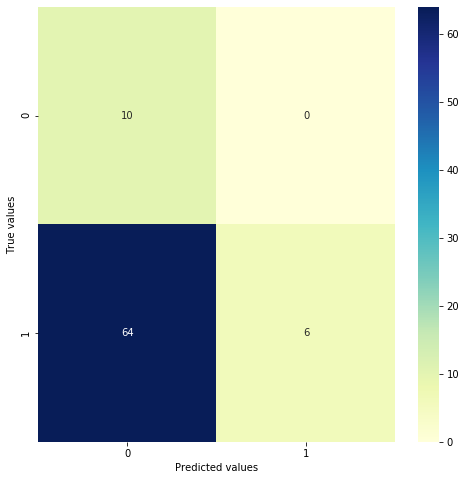

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
sns.heatmap(confusion_matrix(y_true = binary_true, y_pred = binary_pred), annot = True,fmt="d",cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")

In [34]:
print(classification_report(y_true = binary_true, y_pred = binary_pred))

              precision    recall  f1-score   support

           0       0.14      1.00      0.24        10
           1       1.00      0.09      0.16        70

    accuracy                           0.20        80
   macro avg       0.57      0.54      0.20        80
weighted avg       0.89      0.20      0.17        80



**Works even worse. But here's the problem. I am not checking every word in a sentence for PII, just the most unique word. Checking every word for PII gives us this**

In [60]:
binary_pred = []
for i in test_pii['Cleaned_text']:
    tokenized_text = i.split(" ")
    matrix5 = get_word2vec_matrix(tokenized_text)
    pred = random_cv_lr_weights2.predict(matrix5)
    isPII = False
    for i in pred:
        if(i==1):
            isPII = True
    if(isPII == True): binary_pred.append(1)
    else:binary_pred.append(0)

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 210.52it/s]


In [61]:
binary_pred

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

Text(51.0, 0.5, 'True values')

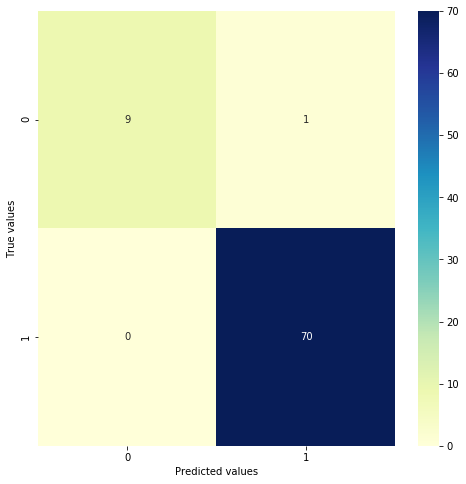

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
sns.heatmap(confusion_matrix(y_true = binary_true, y_pred = binary_pred), annot = True,fmt="d",cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")

In [46]:
print(classification_report(y_true = binary_true, y_pred = binary_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.99      1.00      0.99        70

    accuracy                           0.99        80
   macro avg       0.99      0.95      0.97        80
weighted avg       0.99      0.99      0.99        80



**Works like a charm!**

In [56]:
binary_pred2 = []
for i in mydata['Cleaned_text']:
    tokenized_text = i.split(" ")
    matrix5 = get_word2vec_matrix(tokenized_text)
    pred = random_cv_lr_weights2.predict(matrix5)
    isPII = False
    for i in pred:
        if(i==1):
            isPII = True
    if(isPII == True): binary_pred2.append(1)
    else:binary_pred2.append(0)

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 159.98it/s]


In [57]:
binary_true_mydata = mydata['Target']

In [58]:
binary_pred2

[1, 0, 1, 1, 0]

Text(51.0, 0.5, 'True values')

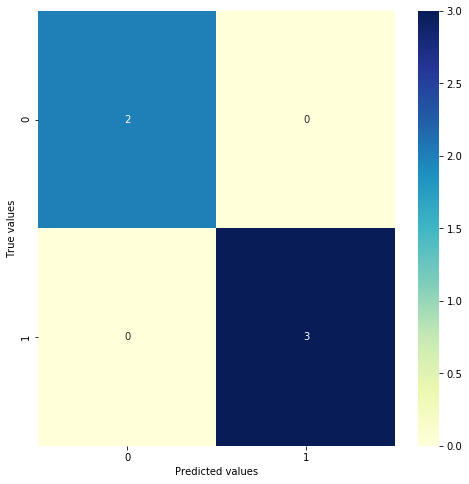

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
sns.heatmap(confusion_matrix(y_true = binary_true_mydata, y_pred = binary_pred2), annot = True,fmt="d",cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")